In [1]:
#Creando gráfico:

In [2]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

In [3]:
#Elementos básicos:

In [4]:
#you don't see much...just what it is:
G

In [5]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [6]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [7]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [8]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [9]:
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

In [10]:
#Drawing

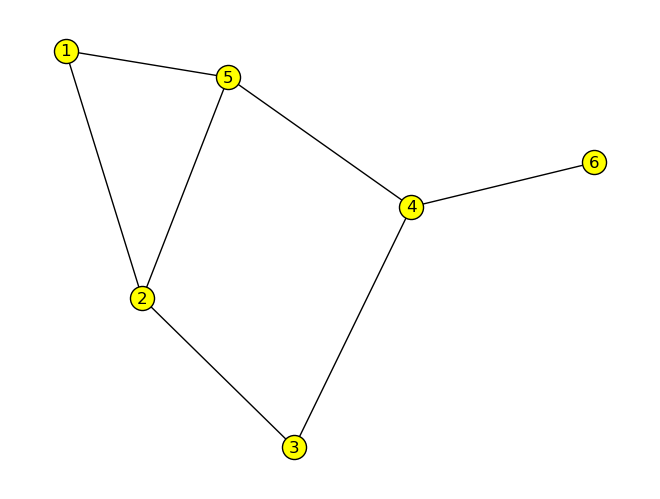

In [11]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

In [12]:
# dict of labels
labels={i:str(i) for i in G.nodes()} #labels={i: yo+str(i) for i in G.nodes()}
labels # string as label

{1: '1', 2: '2', 5: '5', 3: '3', 4: '4', 6: '6'}

In [13]:
nx.set_node_attributes(G,labels,'label') # values according to id
nx.set_node_attributes(G,'red','color') # for all
G.nodes.data()

NodeDataView({1: {'label': '1', 'color': 'red'}, 2: {'label': '2', 'color': 'red'}, 5: {'label': '5', 'color': 'red'}, 3: {'label': '3', 'color': 'red'}, 4: {'label': '4', 'color': 'red'}, 6: {'label': '6', 'color': 'red'}})

In [14]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pyvis.network import Network

Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.show('Gvis.html')

Gvis.html


In [16]:
#Direccionalidad

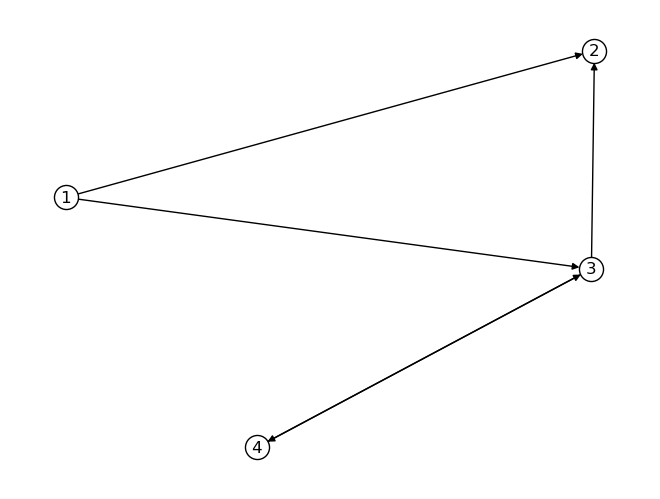

In [17]:
# create graph
dG = nx.DiGraph() #Gráfico direccionado 

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

In [18]:
#Atributos

In [19]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [20]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'male', 3: 'female', 4: 'female'}

In [21]:
#if 
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'male'), (3, 'female'), (4, 'female')])

In [22]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'blue', 3: 'red', 4: 'red'}

In [23]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'male', 'color': 'blue'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'female', 'color': 'red'}})

In [24]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'blue', 'red', 'red'])

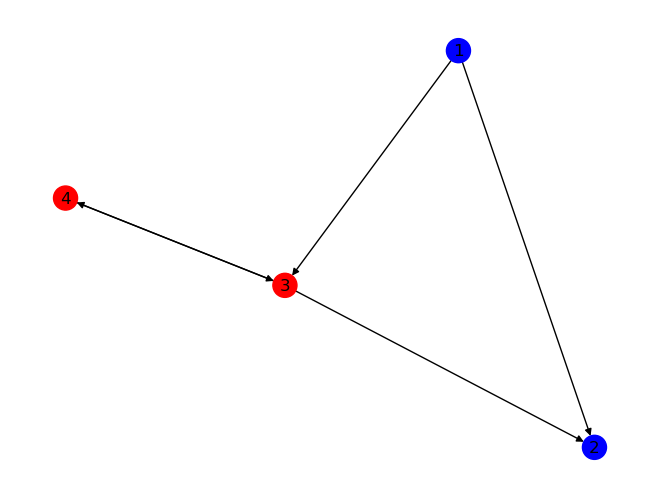

In [25]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

In [26]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [27]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

In [28]:
# if
{i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'grey',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [29]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [30]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

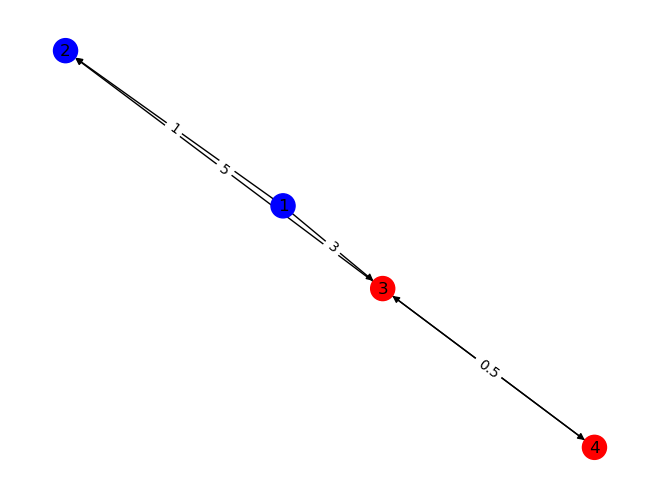

In [31]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

In [32]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16588\3404522425.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(dG, pos,


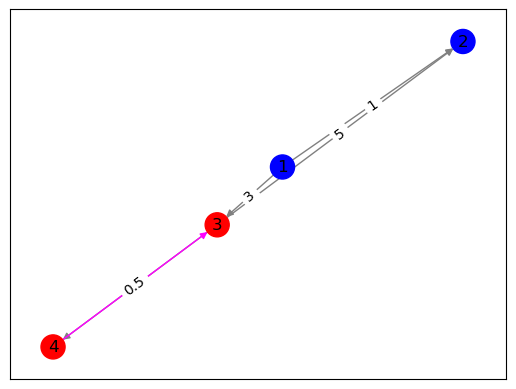

In [33]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
colors_for_nodes=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.spring_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,
                               edge_labels=weight_values)

In [34]:
dG.nodes.data()[1].keys()

dict_keys(['sex', 'color'])

In [35]:
[i[2].keys() for i in dG.edges.data()][0]

dict_keys(['weight', 'color'])

In [36]:
# id as label
labels={i:str(i) for i in dG.nodes()}
nx.set_node_attributes(dG, labels, "label")

# weight as label
labels={e:str(v) for e,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG, labels, "label")

In [37]:
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey', 'label': '1'}), (1, 3, {'weight': 3, 'color': 'grey', 'label': '3'}), (3, 2, {'weight': 5, 'color': 'grey', 'label': '5'}), (3, 4, {'weight': 10, 'color': 'grey', 'label': '10'}), (4, 3, {'weight': 0.5, 'color': 'magenta', 'label': '0.5'})])

In [38]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='remote',directed=True)
dGvis.from_nx(dG.copy())
dGvis.show('dGvis.html')

dGvis.html


In [39]:
#Exporting

In [40]:
nx.write_gml(dG, "dG.gml")

In [41]:
#Caso Élites

In [42]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

In [43]:
FigueData.head()

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila,Multinacional
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [44]:
FigueData.columns

Index(['Romero', 'Graña', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodríguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

In [45]:
#Adjency

In [46]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Nicolini,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
EliteNet = nx.from_pandas_adjacency(adjacency)

In [48]:
# nodes:
len(EliteNet)

37

In [49]:
# edges:
EliteNet.size()

172

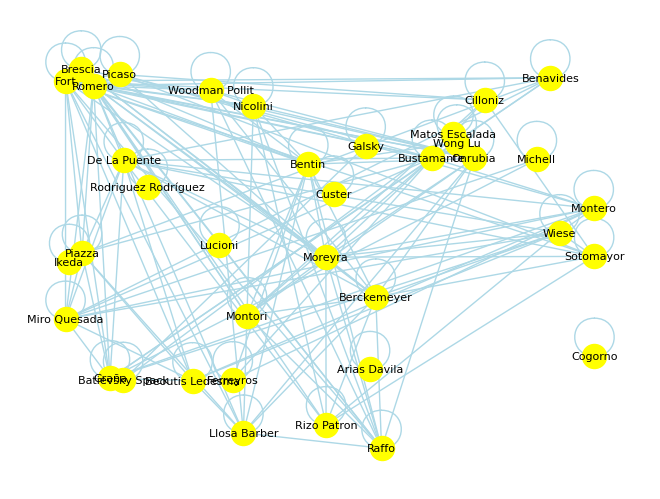

In [50]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [51]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

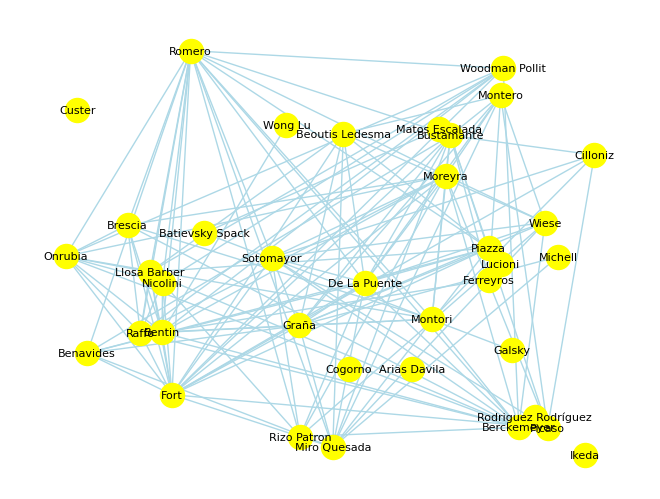

In [52]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [53]:
FigueData['Multinacional'].head()

Romero          1
Graña           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

In [54]:
# no attribute:
EliteNet.nodes.data()

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

In [55]:
dict(zip(FigueData.index,FigueData['Multinacional']))

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

In [56]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

In [57]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")

# updated nodes
EliteNet.nodes.data()

NodeDataView({'Romero': {'multi': 1, 'color': 'red'}, 'Graña': {'multi': 1, 'color': 'red'}, 'Miro Quesada': {'multi': 1, 'color': 'red'}, 'Moreyra': {'multi': 1, 'color': 'red'}, 'Fort': {'multi': 1, 'color': 'red'}, 'De La Puente': {'multi': 1, 'color': 'red'}, 'Wiese': {'multi': 1, 'color': 'red'}, 'Onrubia': {'multi': 1, 'color': 'red'}, 'Brescia': {'multi': 1, 'color': 'red'}, 'Nicolini': {'multi': 1, 'color': 'red'}, 'Montero': {'multi': 1, 'color': 'red'}, 'Picaso': {'multi': 1, 'color': 'red'}, 'Bentin': {'multi': 1, 'color': 'red'}, 'Benavides': {'multi': 1, 'color': 'red'}, 'Bustamante': {'multi': 1, 'color': 'red'}, 'Woodman Pollit': {'multi': 1, 'color': 'red'}, 'Raffo': {'multi': 1, 'color': 'red'}, 'Piazza': {'multi': 1, 'color': 'red'}, 'Berckemeyer': {'multi': 0, 'color': 'green'}, 'Llosa Barber': {'multi': 1, 'color': 'red'}, 'Beoutis Ledesma': {'multi': 1, 'color': 'red'}, 'Rizo Patron': {'multi': 1, 'color': 'red'}, 'Montori': {'multi': 1, 'color': 'red'}, 'Sotomayor

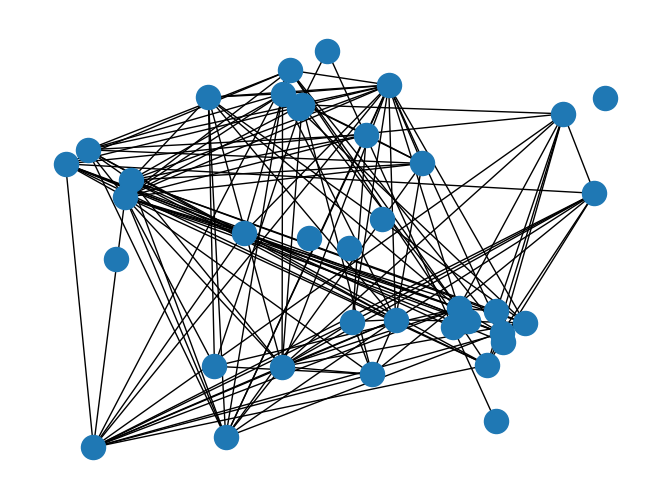

In [58]:
# using node attributes

nx.draw_random(EliteNet)

In [59]:
# Empieza 'Ejercicio 1' 

In [60]:
## 1.1. Ploteando en base a atributos anteriores: 

In [61]:
ColorsE = {e: 'red' if v == 1 else 'green' for e, v in nx.get_node_attributes(EliteNet, "multi").items()}
nx.set_node_attributes(EliteNet, ColorsE, "color")

In [62]:
nx.set_node_attributes(EliteNet, ColorsE, "color")

In [63]:
node_colors = [EliteNet.nodes[node]['color'] for node in EliteNet.nodes]

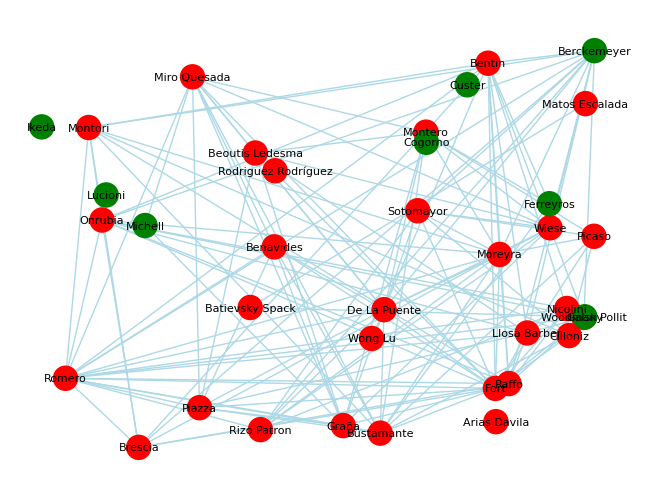

In [64]:
nx.draw_random(EliteNet, node_color=node_colors, edge_color='lightblue', with_labels=True, font_size=8)


In [65]:
## 1.2. Ploteando con Pyvis:

In [66]:
import networkx as nx

In [67]:
from pyvis.network import Network

In [68]:
labels={i:str(i) for i in EliteNet.nodes()}
labels

{'Romero': 'Romero',
 'Graña': 'Graña',
 'Miro Quesada': 'Miro Quesada',
 'Moreyra': 'Moreyra',
 'Fort': 'Fort',
 'De La Puente': 'De La Puente',
 'Wiese': 'Wiese',
 'Onrubia': 'Onrubia',
 'Brescia': 'Brescia',
 'Nicolini': 'Nicolini',
 'Montero': 'Montero',
 'Picaso': 'Picaso',
 'Bentin': 'Bentin',
 'Benavides': 'Benavides',
 'Bustamante': 'Bustamante',
 'Woodman Pollit': 'Woodman Pollit',
 'Raffo': 'Raffo',
 'Piazza': 'Piazza',
 'Berckemeyer': 'Berckemeyer',
 'Llosa Barber': 'Llosa Barber',
 'Beoutis Ledesma': 'Beoutis Ledesma',
 'Rizo Patron': 'Rizo Patron',
 'Montori': 'Montori',
 'Sotomayor': 'Sotomayor',
 'Cilloniz': 'Cilloniz',
 'Ferreyros': 'Ferreyros',
 'Michell': 'Michell',
 'Wong Lu': 'Wong Lu',
 'Batievsky Spack': 'Batievsky Spack',
 'Matos Escalada': 'Matos Escalada',
 'Galsky': 'Galsky',
 'Lucioni': 'Lucioni',
 'Rodriguez Rodríguez': 'Rodriguez Rodríguez',
 'Custer': 'Custer',
 'Ikeda': 'Ikeda',
 'Cogorno': 'Cogorno',
 'Arias Davila': 'Arias Davila'}

In [69]:
nx.set_node_attributes(EliteNet,labels,'label') 
nx.set_node_attributes(EliteNet,'red','color') 
EliteNet.nodes.data()

NodeDataView({'Romero': {'multi': 1, 'color': 'red', 'label': 'Romero'}, 'Graña': {'multi': 1, 'color': 'red', 'label': 'Graña'}, 'Miro Quesada': {'multi': 1, 'color': 'red', 'label': 'Miro Quesada'}, 'Moreyra': {'multi': 1, 'color': 'red', 'label': 'Moreyra'}, 'Fort': {'multi': 1, 'color': 'red', 'label': 'Fort'}, 'De La Puente': {'multi': 1, 'color': 'red', 'label': 'De La Puente'}, 'Wiese': {'multi': 1, 'color': 'red', 'label': 'Wiese'}, 'Onrubia': {'multi': 1, 'color': 'red', 'label': 'Onrubia'}, 'Brescia': {'multi': 1, 'color': 'red', 'label': 'Brescia'}, 'Nicolini': {'multi': 1, 'color': 'red', 'label': 'Nicolini'}, 'Montero': {'multi': 1, 'color': 'red', 'label': 'Montero'}, 'Picaso': {'multi': 1, 'color': 'red', 'label': 'Picaso'}, 'Bentin': {'multi': 1, 'color': 'red', 'label': 'Bentin'}, 'Benavides': {'multi': 1, 'color': 'red', 'label': 'Benavides'}, 'Bustamante': {'multi': 1, 'color': 'red', 'label': 'Bustamante'}, 'Woodman Pollit': {'multi': 1, 'color': 'red', 'label': 'Wo

In [70]:
Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(EliteNet.copy()) # create a copy!
Gvis.show('Gvis.html')

Gvis.html


In [71]:
## 1.3. Exportación: 

In [72]:
nx.write_gml(EliteNet, os.path.join("graphdata","EliteNet.gml"))

In [73]:
## 1.4. Parte en R:     

In [ ]:
### Link a R pubs: https://rpubs.com/Santiagomv2906/1187775